In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
# Read blip-results.jsonl and summarize the labels for each cluster label
data = []
processed = {}
with open('output_mapped.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

for entry in data:
    processed[entry['label']] = {}
    for key in entry['cluster'].keys():
        processed[entry['label']][key] = entry['cluster'][key]


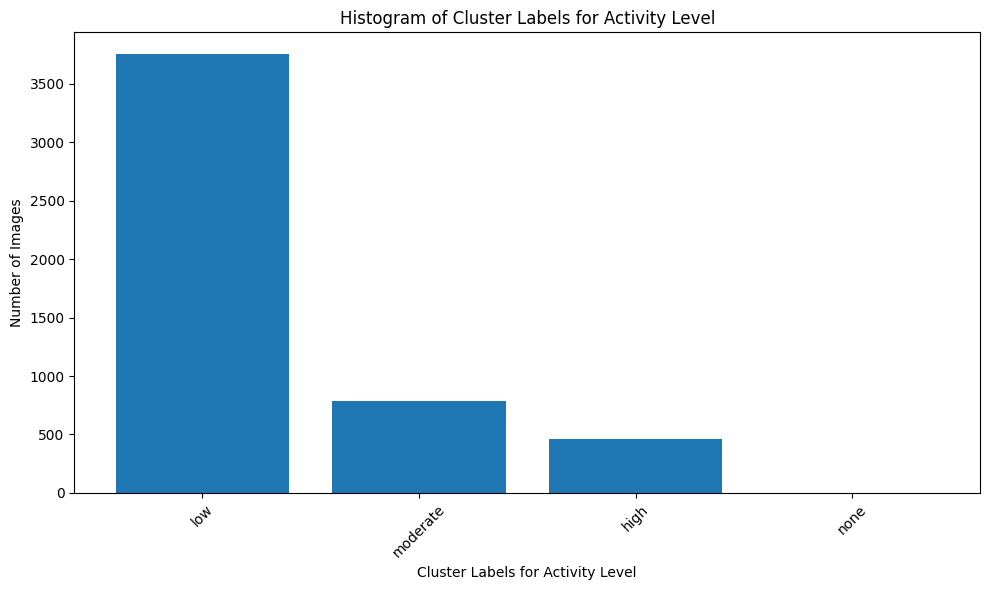

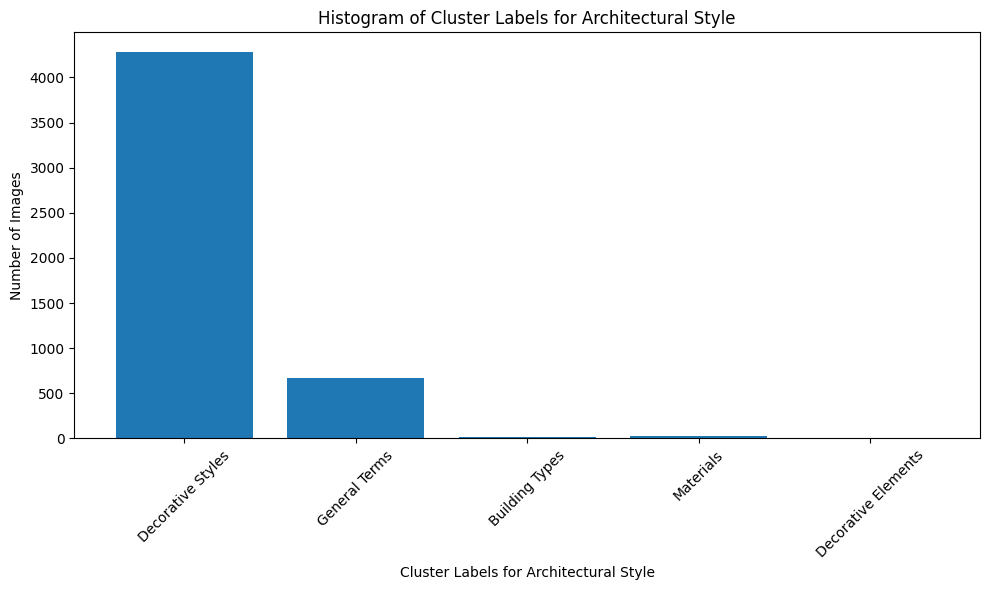

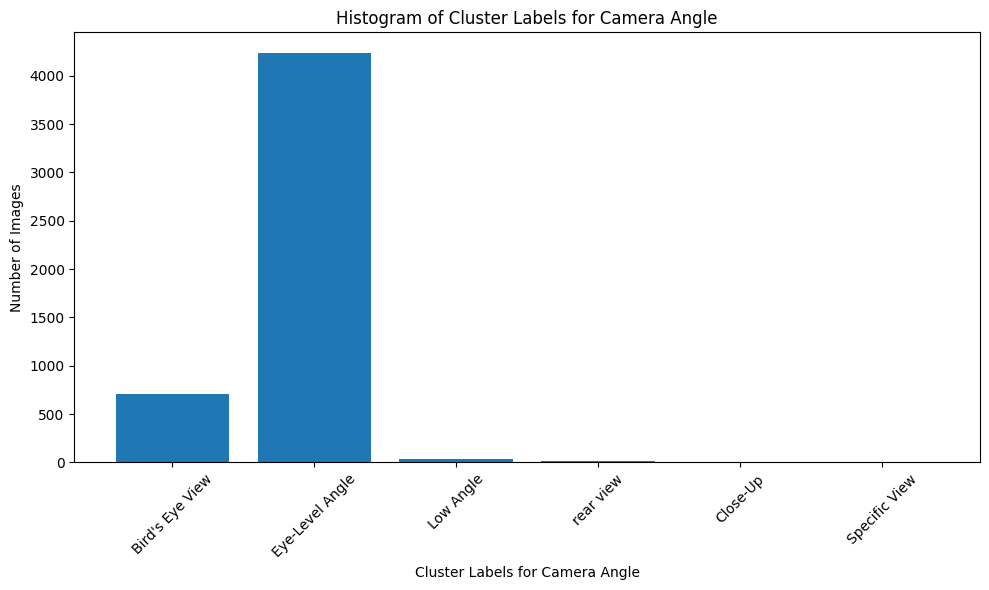

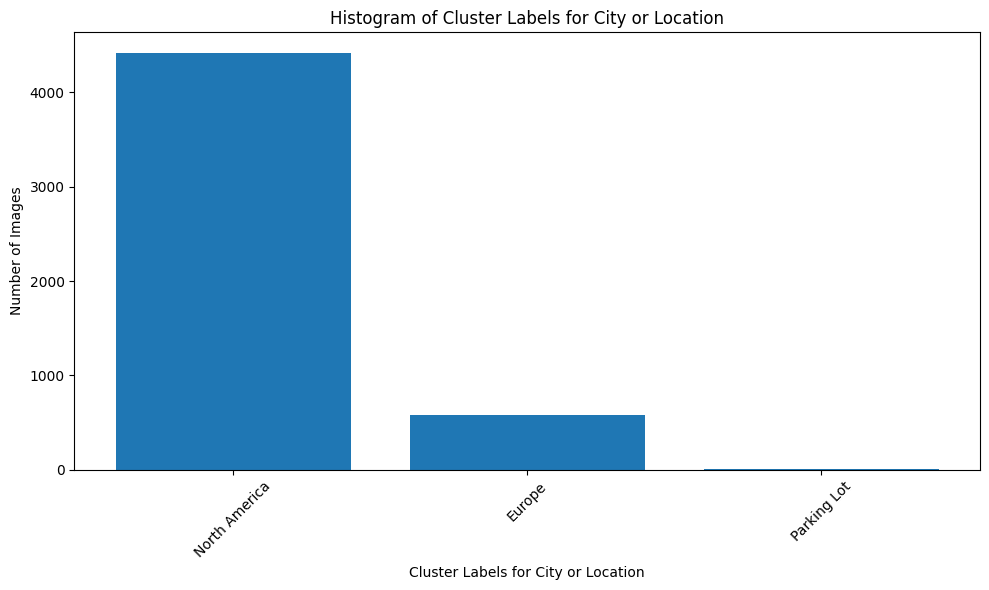

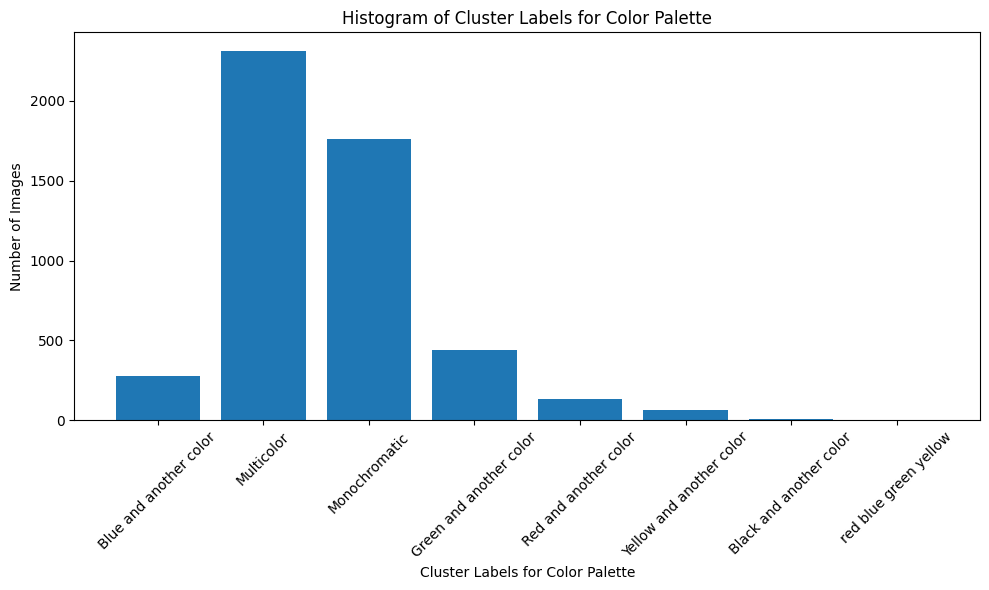

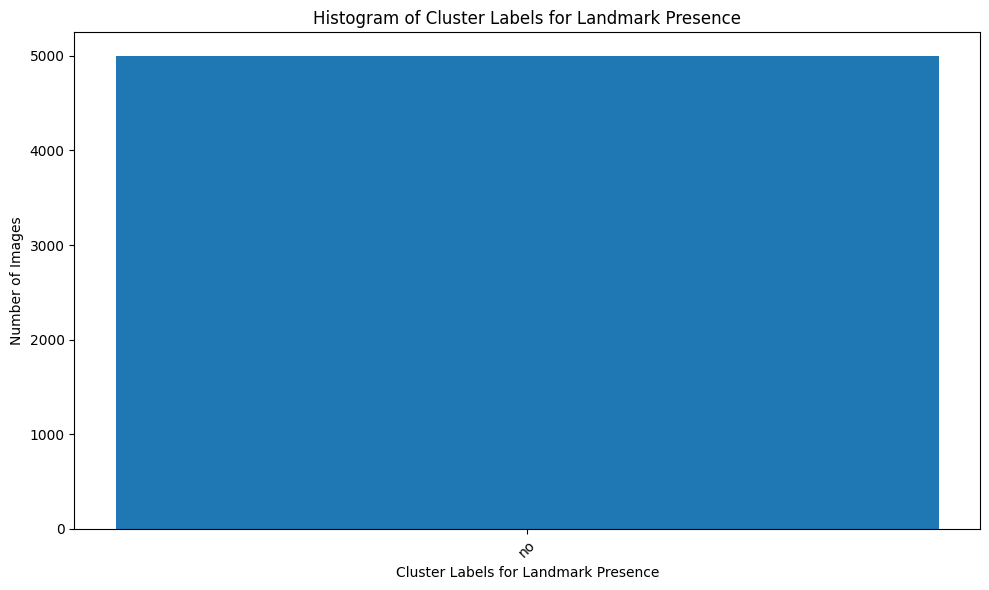

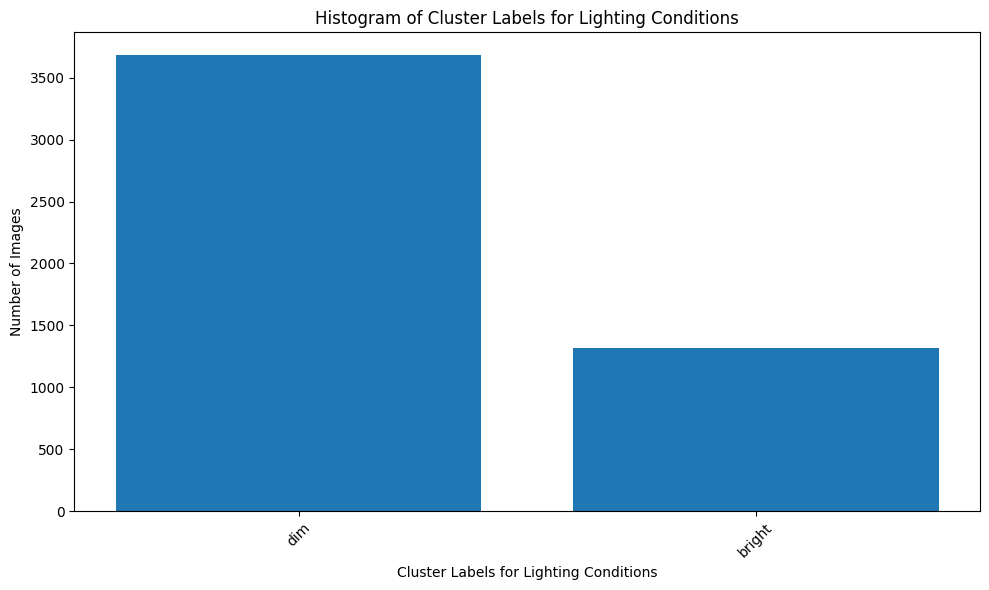

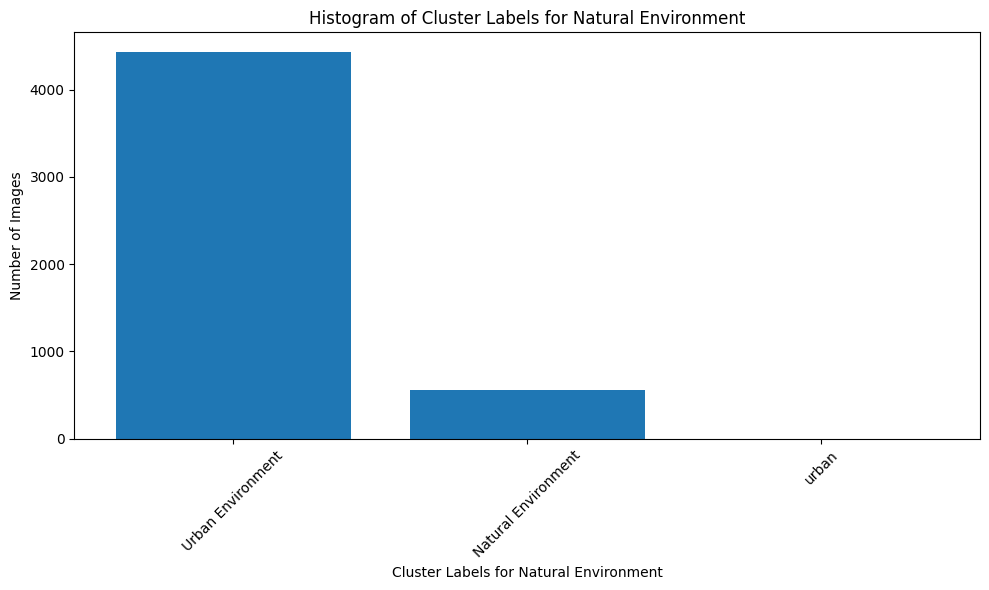

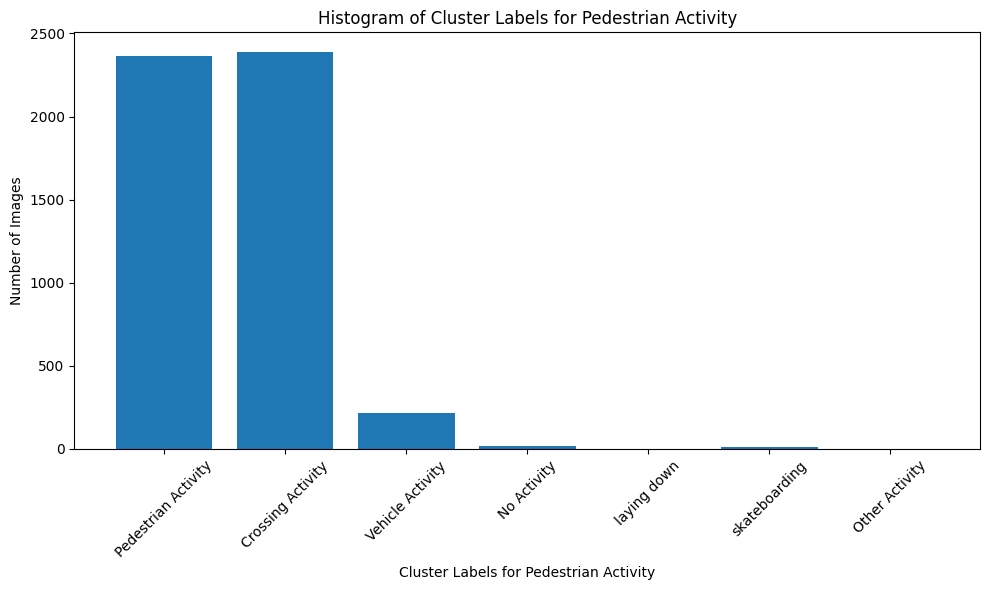

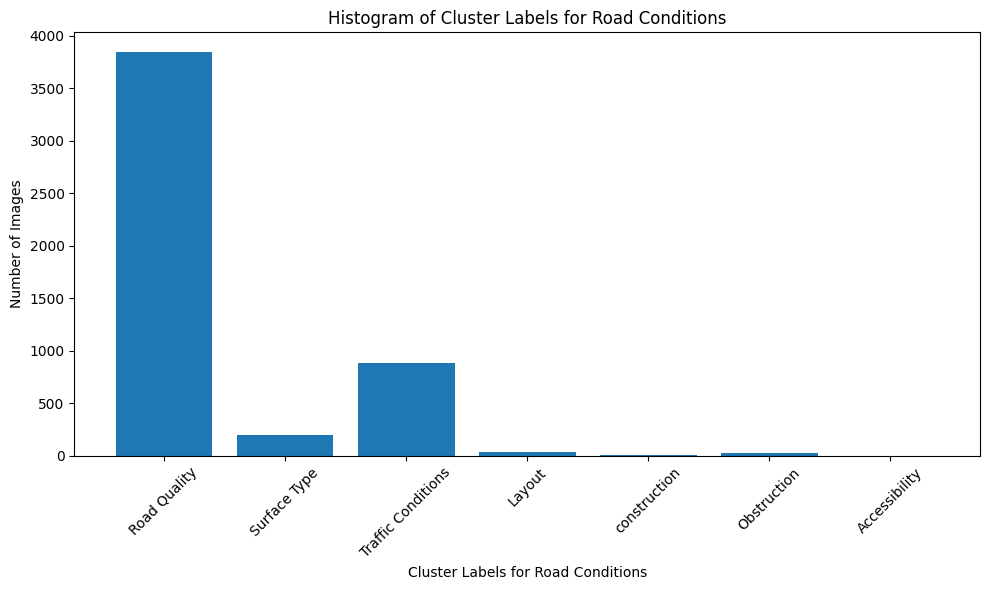

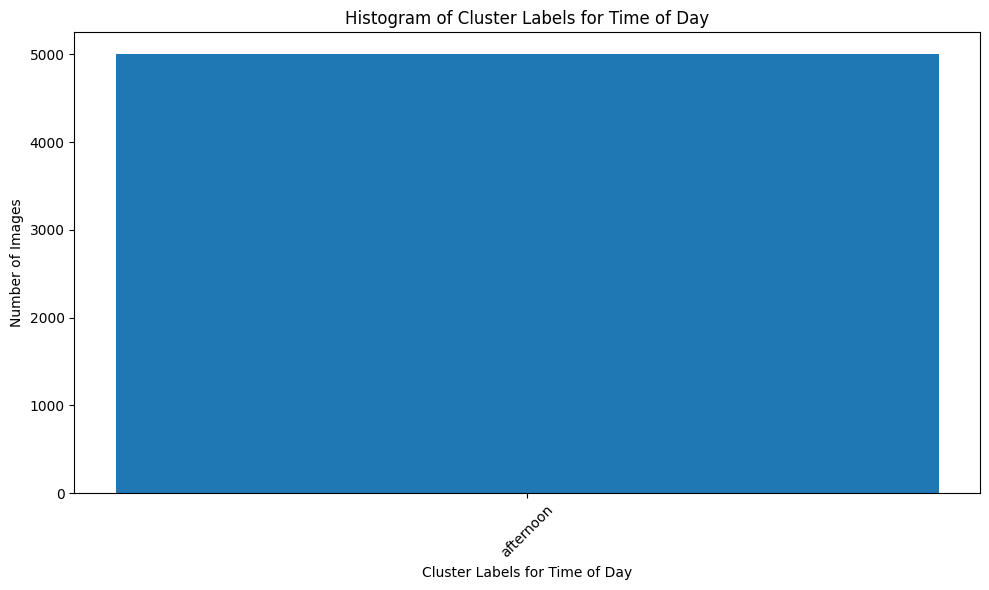

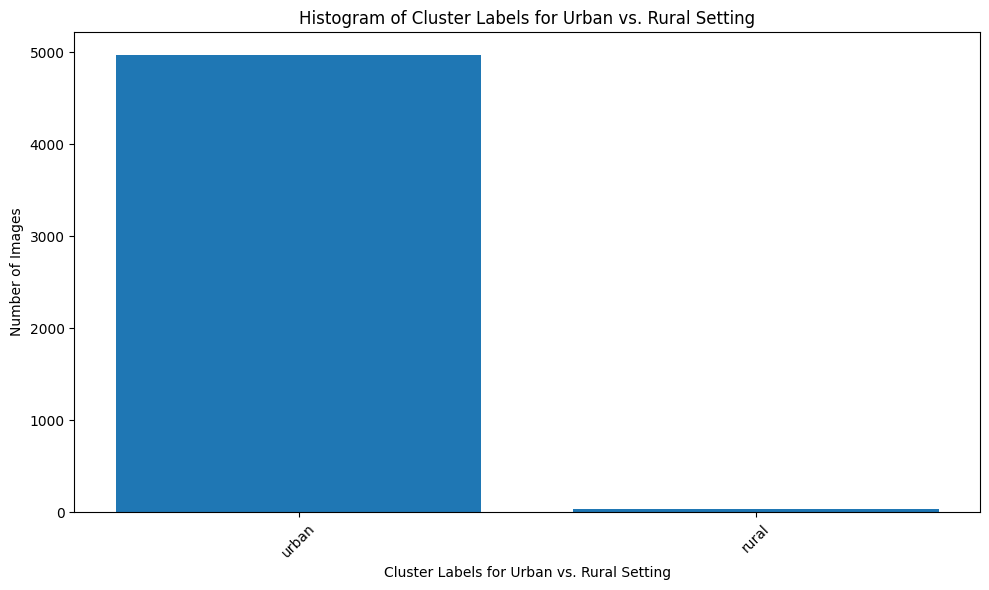

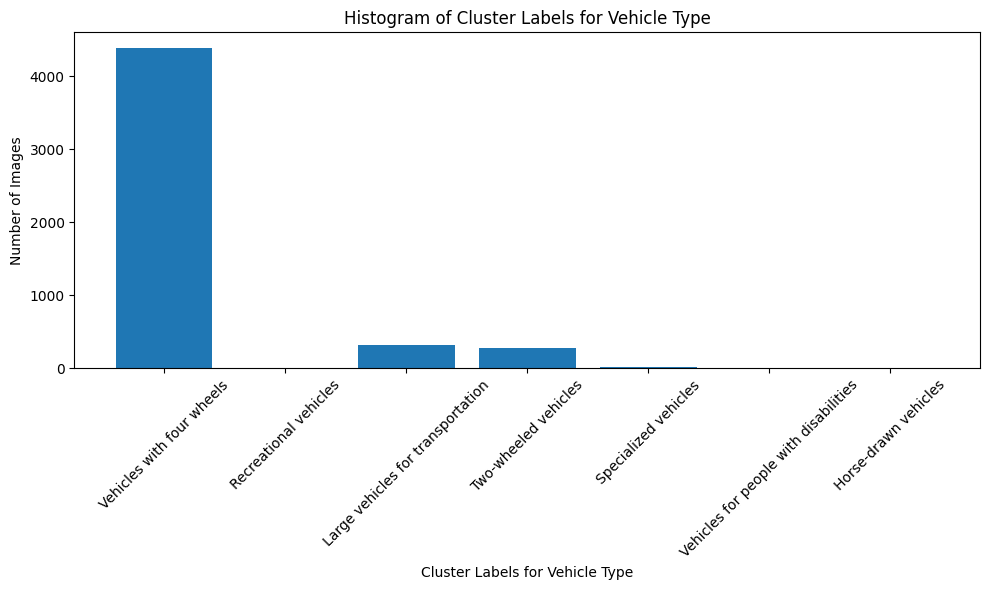

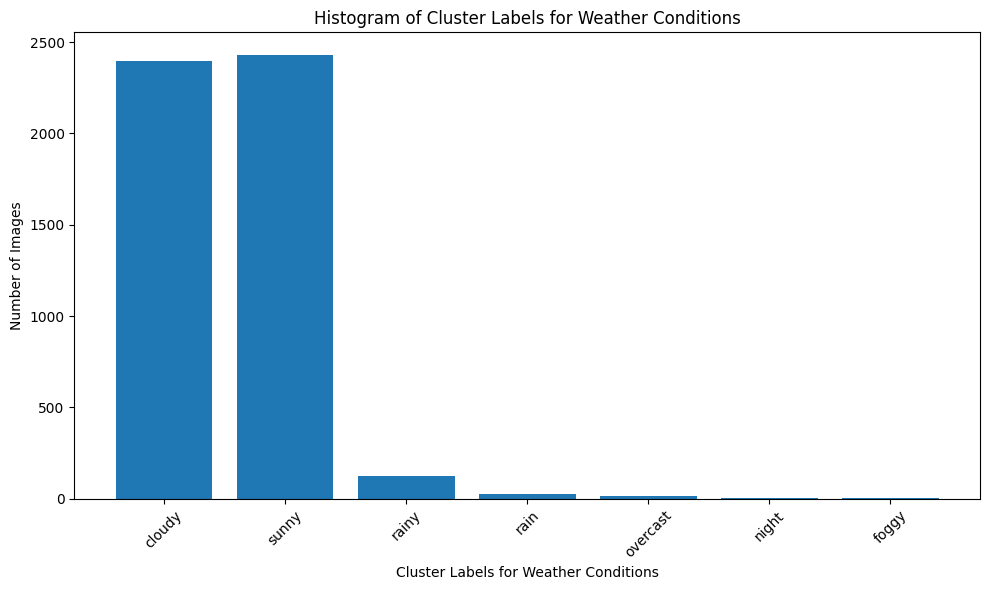

In [3]:
# Count unique labels for each criterion and make histograms
criteria = list(next(iter(processed.values())).keys())

for criterion in criteria:
    label_counts = {}
    for label, clusters in processed.items():
        cluster_label = clusters[criterion]
        if cluster_label not in label_counts:
            label_counts[cluster_label] = 0
        label_counts[cluster_label] += 1

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel(f'Cluster Labels for {criterion}')
    plt.ylabel('Number of Images')
    plt.title(f'Histogram of Cluster Labels for {criterion}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()